In [1]:
#案例：泰坦尼克号幸存者预测

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv(r"C:\Users\hp\Desktop\python\machine learning\decision tree\data.csv"
                   ,index_col= 0)
#在都是“\”的路径前加上r，或者把所有“\”改成“/”

In [5]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [3]:
data.info()#注意分类器（decisionclassify）需要是数字类型的数据

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [4]:
data.head(10)#默认5行

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [13]:
#由data.info发现，在表中有的属性值为空，还有一些属性对结果没有影响。
#现在需要对数据做预处理

In [6]:
#筛选特征（把对结果没有作用的特征去掉）通过分析，舱名，乘客姓名以及票号对结果没有影响
data.drop(['Cabin','Name','Ticket'],inplace=True,axis=1)#axis=1是删除列
#参数inplace=True表示在删除特征之后覆盖原表，默认是False

In [7]:
#处理缺失值
data['Age']=data['Age'].fillna(data['Age'].mean())
#对年龄的缺失值使用fillna填充，通过年龄的平均值填充（并不是所有的缺失值都可以用平均值填充）

In [8]:
data.info()#此时age都是non-null，然后发现Embarked中只有两个缺失值，则可以直接删掉这两行

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


In [9]:
#drop.dropna是删除为空的所在行或列
#此时是针对data里所有的有缺失值进行删掉
data=data.dropna(axis=0)#默认是axis=0（即括号里可以不写“axis=0”）

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [22]:
#由于分类型数据需要是数字类型，接下来将data中的非数字类型数据做处理

In [11]:
data['Embarked'].unique()#看data中Embarked属性中有多少种取值
data['Embarked'].unique().tolist()#将其转化成列表

['S', 'C', 'Q']

In [12]:
labels=data['Embarked'].unique().tolist()
#labels.index('S')#查看列表中的索引
data['Embarked']=data['Embarked'].apply(lambda x: labels.index(x))
#将Embarked中的S，C，Q对应的索引值替换掉S，C，Q，即此时将S转换成0，C转换成1，Q转换成2

<ipython-input-12-bd0e6672c674>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Embarked']=data['Embarked'].apply(lambda x: labels.index(x))


In [32]:
#继续将性别转换成分类型数据（可以继续使用上面处理Embarked的方法）
#现在使用另一种方法

In [13]:
data['Sex']=(data['Sex']=='male').astype('int')
#将布尔值true和false转换成1和0

<ipython-input-13-9db1e7086e0d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sex']=(data['Sex']=='male').astype('int')


In [14]:
data
#Pclass代表舱位等级，SibSp代表兄弟姐妹/配偶的数量，Parch代表父母/孩子的数量

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.000000,1,0,7.2500,0
2,1,1,0,38.000000,1,0,71.2833,1
3,1,3,0,26.000000,0,0,7.9250,0
4,1,1,0,35.000000,1,0,53.1000,0
5,0,3,1,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
887,0,2,1,27.000000,0,0,13.0000,0
888,1,1,0,19.000000,0,0,30.0000,0
889,0,3,0,29.699118,1,2,23.4500,0


In [15]:
x=data.iloc[:,data.columns!="Survived"]
#将不等于Survived的列取出来（即去掉Survived列）

In [25]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,1,22.000000,1,0,7.2500,0
2,1,0,38.000000,1,0,71.2833,1
3,3,0,26.000000,0,0,7.9250,0
4,1,0,35.000000,1,0,53.1000,0
5,3,1,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...
887,2,1,27.000000,0,0,13.0000,0
888,1,0,19.000000,0,0,30.0000,0
889,3,0,29.699118,1,2,23.4500,0


In [ ]:
y=data.iloc[:,data.columns=="Survived"]
#取出Survived列

In [17]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(x,y,test_size=0.3)

In [71]:
#此时Xtrain和Xtest,Ytrain,Ytest中的索引值变乱了，为了保证后续操作的简便，将索引恢复到从0开始

In [18]:
#将Xtrain,Xtest,Ytrain,Ytest的索引恢复到从0开始
#例如：range(Xtrain.shape[0])返回0-621的整数（此时Xtrain.shape[0]是622）
for i in [Xtrain,Xtest,Ytrain,Ytest]:
    i.index=range(i.shape[0])

In [ ]:
#开始构建模型

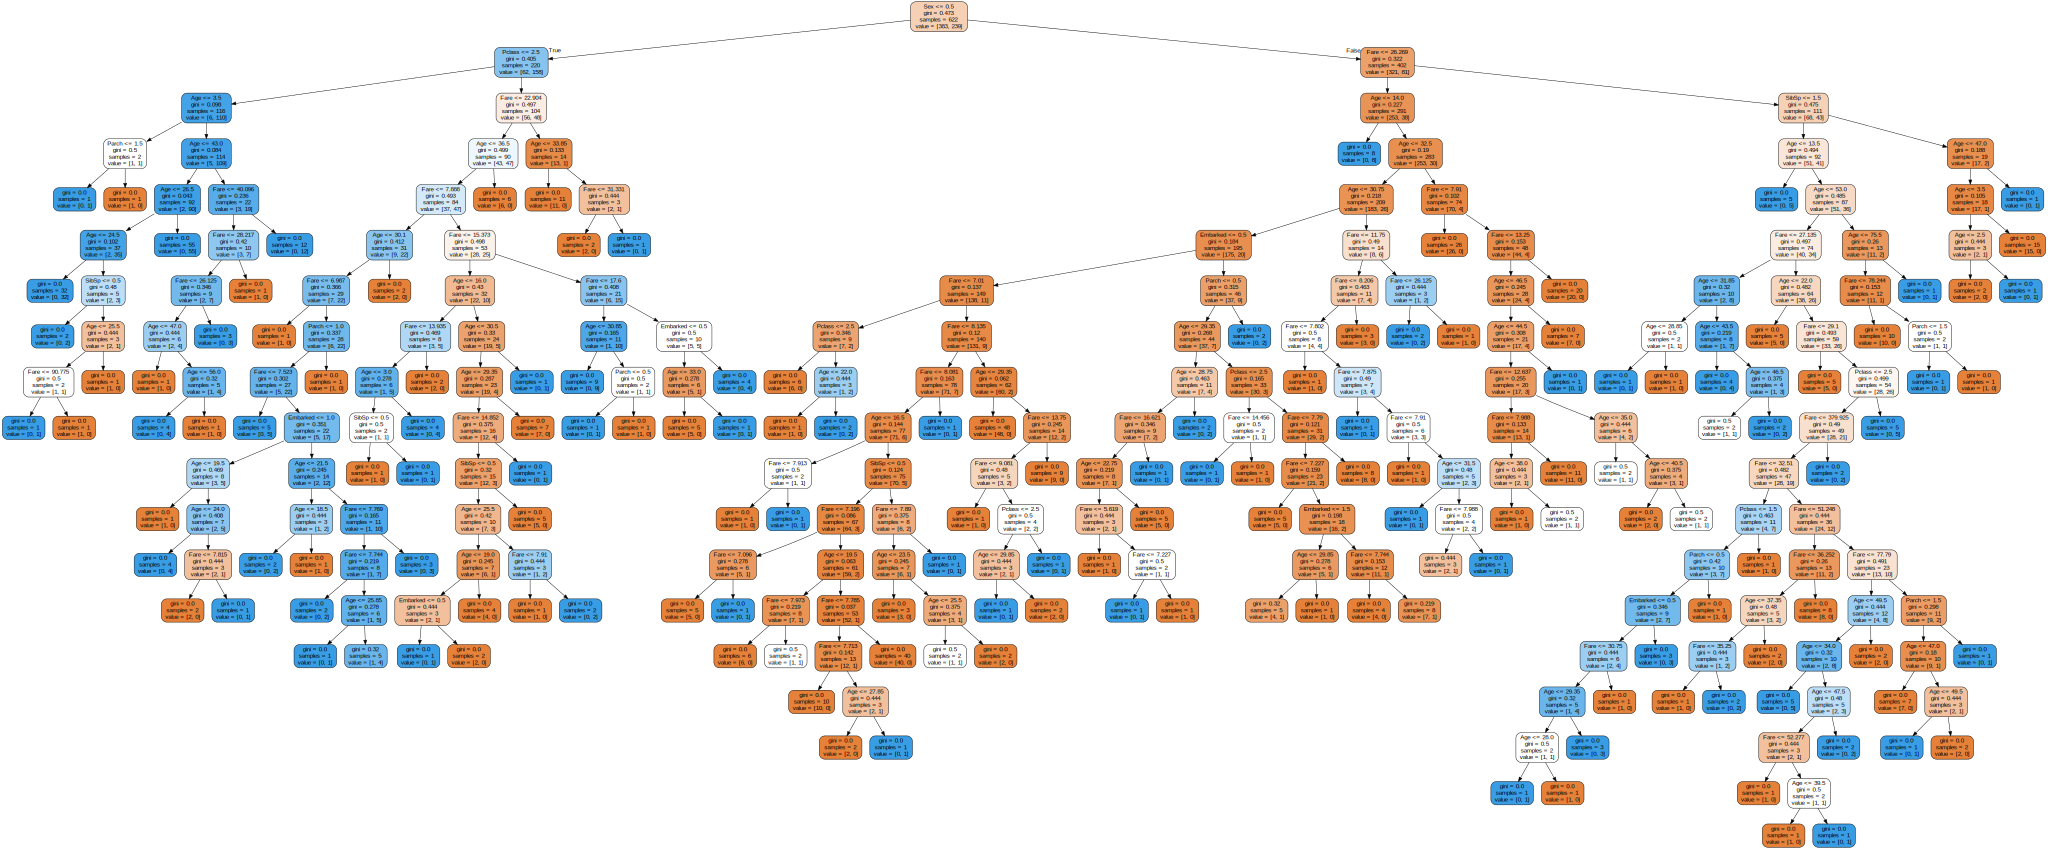

In [30]:
clf=DecisionTreeClassifier(random_state=25)
clf=clf.fit(Xtrain,Ytrain)
score=clf.score(Xtest,Ytest)
feature_name = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
from sklearn import tree
import graphviz
dot_data=tree.export_graphviz(clf
                              ,filled=True
                              ,feature_names=feature_name
#                               ,class_names=['死亡','生存']
                              ,rounded=True               
                             )
graph=graphviz.Source(dot_data)
graph

In [23]:
score

0.7602996254681648

In [24]:
clf.feature_importances_

array([0.11697963, 0.26916863, 0.27409498, 0.0245273 , 0.0338509 ,
       0.2574156 , 0.02396297])

In [26]:
#使用交叉验证看看整体分数如何
clf=DecisionTreeClassifier(random_state=25)
score=cross_val_score(clf,x,y,cv=10).mean()
score

0.7739274770173645

0.8063184663536778


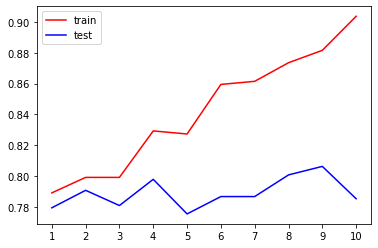

In [26]:
tr=[]
te=[]
#得到10次的训练集和10次交叉验证的平均分数
for i in range(10):
    clf=DecisionTreeClassifier(random_state=25
                              ,max_depth=i+1
                              ,criterion='entropy'
                              ,splitter='random'
                              )
    clf=clf.fit(Xtrain,Ytrain)
    #分别计算训练集的分数和测试集的分数
    score_tr=clf.score(Xtrain,Ytrain)
    score_te=cross_val_score(clf,x,y,cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)
print(max(te))
plt.plot(range(1,11),tr,color='red',label='train')
plt.plot(range(1,11),te,color='blue',label='test')
plt.xticks(range(1,11))#修改横坐标的表尺，范围是1-10
plt.legend()#给图像加上图例
plt.show()


In [27]:
#由于没有找到比较满意的结果，接下来我们通过网格搜索来看看哪些组合能够达到最优的效果
#网格搜索：能够帮助我们同时调整多个参数的技术，本质是一种枚举

In [28]:
# import numpy as np
# np.linspace(0,0.5,50)#生成一个伪随机，均匀划分的等差数列
#此处为啥用linspace不用range，因为linspace是左闭右闭，而range是左闭右开，在取值上linspace更方便一些

array([0.        , 0.01020408, 0.02040816, 0.03061224, 0.04081633,
       0.05102041, 0.06122449, 0.07142857, 0.08163265, 0.09183673,
       0.10204082, 0.1122449 , 0.12244898, 0.13265306, 0.14285714,
       0.15306122, 0.16326531, 0.17346939, 0.18367347, 0.19387755,
       0.20408163, 0.21428571, 0.2244898 , 0.23469388, 0.24489796,
       0.25510204, 0.26530612, 0.2755102 , 0.28571429, 0.29591837,
       0.30612245, 0.31632653, 0.32653061, 0.33673469, 0.34693878,
       0.35714286, 0.36734694, 0.37755102, 0.3877551 , 0.39795918,
       0.40816327, 0.41836735, 0.42857143, 0.43877551, 0.44897959,
       0.45918367, 0.46938776, 0.47959184, 0.48979592, 0.5       ])

In [34]:
import numpy as np
gini_thresholds=np.linspace(0,0.5,50)
#entrophy_thresholds=np.linspace(0,0.1,50)
#parameters:是一串参数和这些参数对应的，我们希望网格搜索来搜索的参数的取值范围
parameters={"criterion":("gini","entropy")
           ,"splitter":("best","random")
           ,"max_depth":[*range(1,10)]
            #这里的*是解包的意思，把1-9这些数字放到列表里
           ,"min_samples_leaf":[*range(1,50,5)]
           ,"min_impurity_decrease":[*np.linspace(0,0.5,20)]
           }
clf=DecisionTreeClassifier(random_state=25)
GS=GridSearchCV(clf,parameters,cv=10)
GS.fit(Xtrain,Ytrain)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=25),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_impurity_decrease': [0.0, 0.02631578947368421,
                                                   0.05263157894736842,
                                                   0.07894736842105263,
                                                   0.10526315789473684,
                                                   0.13157894736842105,
                                                   0.15789473684210525,
                                                   0.18421052631578946,
                                                   0.21052631578947367,
                                                   0.23684210526315788,
                                                   0.2631578947368421,
                                                   0.2894736842105263,
        

In [33]:
GS.best_params_#会从我们输入的参数和参数取值的列表中返回最佳组合

NameError: name 'GS' is not defined

In [35]:
GS.best_score_#网格搜索后的模型的评判标准

0.8273877551020409